### Работа с грязными данными

#### 1. В переменной df находится датафрэйм. Запишите в переменную  df_shape строку с информацией о том, сколько строк и столбцов он содержит, в следующем виде:

'df has y rows and x columns'

где y — число строк, а x — число колонок.

In [87]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

Создадим df

In [88]:
df= pd.DataFrame ({'client_id': [None, 3998.0, None, None, 5736.0], 'sex': [None, 1.0, None, None, 0.0], 'wealth': [None, 'high', None, None, 'high'], 'age': [58, 55, 46, 23, 44]})

В новую переменную запишем необходимый текст и оставим место для значений

In [89]:
df_shape = "df has {} rows and {} columns"

С помощью функции format добавим в df_shape информацию о количестве строк и колонок

In [90]:
df_shape.format(df.shape[0], df.shape[1])

'df has 5 rows and 4 columns'

#### 2. Сохраните в переменную na_number серию, в которой для каждой колонки будет указано, сколько пропущенных значений она содержит

Воспользуемся методом isna, он вернёт df

В строках где значение пропущено он укажет 'True'

Где значение не пропущено 'False'

C помощью метода 'sum' посчитаем пропущенные значения, запишем всё в переменную na_number

In [91]:
na_number= df.isna().sum()

#### 3. Сохраните в переменную df_types типы данных каждой колонки датафрэйма df.

In [92]:
df_types = df.dtypes

#### 4. Внезапно оказалось, что в колонке age значения хранятся в виде строк! Поменяйте тип значений на целочисленный в этой колонке датафрэйма df.

Воспользуемся методом astype

In [93]:
df = df.astype({'age': 'int64'})

#### 5. Как выяснилось, для дальнейшего анализа нам не понадобятся колонки sex и age – удалите их из датафрэйма.

Для удаления воспользуемся методом drop

В параметре columns укажем список с колонками

In [94]:
df =df.drop(columns = ['sex', 'age'])

#### 6. А теперь проверим, есть ли в нашей таблице df дубликаты по полю client_id. Сохраните в переменную df датафрейм, в котором не будет дубликатов по колонке client_id, оставив первую строку с id

Воспользуемся методом drop_dublicates, в параметр subset необходимо поместить колонку по которой будут удаляться дубликаты

In [95]:
df =df.drop_duplicates (subset='client_id')

#### 7. А сейчас ненадолго вернемся к чистому Python.
#### В списке numbers содержатся числа. Добавьте через цикл в список positive_numbers положительные числа из numbers. Если вам попался 0, то нужно прекратить этот цикл.

Например,

numbers = [1, -2, 3, 0, -3, 2]

Тогда positive_numbers должен быть:

positive_numbers = [1, 3]


Создадим переменную numbers

In [96]:
numbers = [1, -2, 3, 0, -3, 2]

Создадим пустой список positive_numbers

In [97]:
positive_numbers= []

Напишем цикл, который будет добавлять в переменную positive_numbers значения больше нуля

И который будет прерываться, если какое-либо значение равно нулю

In [98]:
for number in numbers:
    if number == 0:
        break
    elif number > 0:
        positive_numbers.append(number)    

#### 8. Продолжим анализ данных по поездкам на такси из Перу. В предыдущем уроке вы изучили распределения оценок водителей и клиентов. Теперь посмотрим на колонки со временем!

#### Ссылка на датасет находится в переменной path_to_file. Сохраните данные в переменную taxi, разделитель — ;.

#### Затем приведите столбцы start_at, end_at, arrived_at к формату даты, используя pd.to_datetime(). Отфильтруйте данные и оставьте наблюдения со статусом заказа "asap" и "reserved" (start_type) .

Запишем путь в переменную

In [99]:
path_to_file = '/mnt/HC_Volume_18315164/home-jupyter/jupyter-v-kozlov-22/lesson_3/3_taxi_peru (1).csv'

In [100]:
taxi = pd.read_csv(path_to_file, sep = ';')

Переведем нужные нам колонки в формат даты

In [101]:
taxi['start_at'] =pd.to_datetime(taxi['start_at'])
taxi['end_at'] =pd.to_datetime(taxi['end_at'])
taxi['arrived_at'] =pd.to_datetime(taxi['arrived_at'])

Отфильтруем строки

In [102]:
taxi =taxi.query("start_type == 'asap' or start_type == 'reserved'")

#### 9. ⭐️Задание со звёздочкой!⭐️

#### Создайте колонку wait_time, в которой будет храниться разница между временем подачи машины (arrived_at) и временем заказа (start_at) в минутах.

Создадим колонку с разницей  временем подачи машины (arrived_at) и временем заказа (start_at) в минутах

In [103]:
taxi['wait_time'] = taxi.arrived_at - taxi.start_at

Поменяем тип колонки на таймдельта

In [104]:
taxi.wait_time =taxi.wait_time.astype('timedelta64[m]')

#### 10. ⭐️Задание со звёздочкой!⭐️

#### Посмотрим, какие водители опаздывали на заказы к определенному времени (start_type == 'reserved'). Опозданием считается время ожидания wait_time > 0.0.
#### Сгруппируйте отфильтрованные данные по driver_id и в качестве ответа укажите id водителя, который опоздал на заказ интересующего нас типа наибольшее число раз

In [105]:
taxi.query("start_type == 'reserved' and wait_time > 0.0") \
    .groupby('driver_id', as_index = False) \
    .agg({'user_id': 'count'}) \
    .sort_values('user_id', ascending = False)

,driver_id,user_id
24,406921adcca37705ef527b4246c0cfea,67
86,d665fb9f75ef5d9cd0fd89479380ba78,59
93,ec84a73745199ff840ecafcb924383ad,57
29,56f59b58bcbbd1cdabc3652e713134c2,51
77,c814db2127582cf95dea1f74f43127c2,45
...,...,...
88,d7bf644eb441cda6127f91addebb85c4,1
71,b68895736389f2949faa8c73555b81ac,1
51,8cb98e46b27af1e6fca8768a2a6329f3,1
16,389bfa333ba8fa7281dd5f0e1b57c0c1,1


#### 11. Подумайте, что может влиять на число опозданий из прошлого задания 🤔

На число опозданий может влиять пунктуальность водителя и число взятых заказов

#### 12. ⭐️Задание со звёздочкой!⭐️

#### Добавьте столбец month, где будет храниться номер месяца, в котором был сделан заказ (start_at),  и столбец weekday – название дня недели. 

Запишем в колонку month месяц, извлеченный из колонки start_at с помощью метода dt.strftime

Переведем тип колонки в формат целого числа

In [106]:
taxi['month'] = taxi.start_at.dt.strftime('%m').astype('int')

Запишем в колонку weekday месяц, извлеченный из колонки start_at с помощью метода dt.strftime

In [107]:
taxi['weekday'] = taxi.start_at.dt.strftime('%A')

#### 13.⭐️Задание со звёздочкой!⭐️

#### Постройте график числа заказов по месяцам (month). Подумайте, с чем может быть связана полученная картина. 

#### Вопрос: в каком летнем месяце было сделано наименьшее число заказов? В качестве ответа введите номер месяца (6, 7 или 8). 


Сгруппируем данные по количеству заказов по месяцам

In [108]:
monthly_orders = taxi.groupby('month', as_index = False) \
    .agg({'end_state' : 'count'}) \
    .sort_values('end_state') \
    .rename(columns = {'end_state': 'orders'}) \
    .reset_index (drop = True)    

Построим график, показывающий количество заказов по месяцам

Меньше всего заказов было сделано в июле

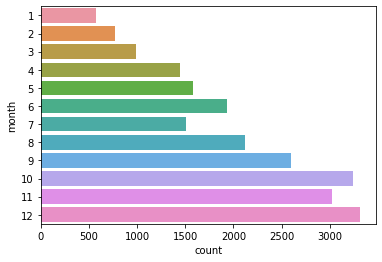

In [109]:
ax =sns.countplot (y = 'month',  data = taxi)

#### 14.⭐️Задание со звёздочкой!⭐️

#### А теперь – график по дням недели (weekday). Задать порядок столбиков на графике можно с помощью аргумента order, которому нужно передать список названий в нужном порядке. Например: 

sns.countplot(data['column'], order=['One', 'Two', 'Three'])

#### Вопрос: в какой день недели суммарно поступает меньше всего заказов? Укажите то название, которое написано в самом датафрейме.

Используем countplot для построения графика

Зададим значения по порядку

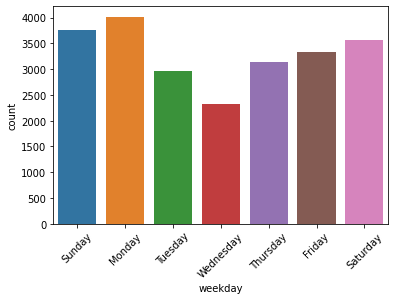

In [110]:
ax = sns.countplot(taxi['weekday'], order = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday'])
# Для удобства развернем на 45 градусов название дней недели
ax.tick_params (axis= 'x', rotation = 45)
warnings.filterwarnings('ignore')

#### 15. ⭐️Задание со звёздочкой!⭐️

#### Также мы можем посмотреть на несколько простых метрик, показывающих число уникальных пользователей за определённый период:

* DAU (daily active users) – число уникальных пользователей за день
* WAU (weekly active users) – число уникальных пользователей за неделю
* MAU (monthly active users) – число уникальных пользователей за месяц
* Активные пользователи – те, кто воспользовался приложением и сделал хотя бы один заказ за выбранный промежуток времени. 

#### Постройте график MAU и выберите верные утверждения. 

Рассчитаем MAU (monthly active users)

In [111]:
MAU = taxi.groupby('month', as_index= False) \
    .agg({'user_id': 'nunique'})

Построим lineplot, который покажет нам как менялось количество уникальных пользователей с течением месяцев

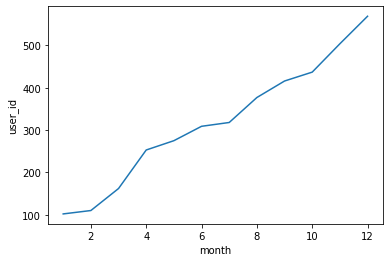

In [112]:
lines = sns.lineplot(MAU.month, MAU.user_id)
warnings.filterwarnings('ignore')

Таким образом, MAU за апрель примерно в 2.5 раза больше, чем за январь

В течение всего года число уникальных пользователей увеличивалось

In [113]:
MAU

,month,user_id
0,1,102
1,2,110
2,3,162
3,4,253
4,5,275
5,6,309
6,7,318
7,8,377
8,9,416
9,10,437


#### 16. 💀 Сложное задание! 💀

#### Соберите все данные из папки data в один датафрэйм, имеющий следующие столбцы: колонки из самих файлов (product_id, quantity), имя пользователя (name), и дату этих покупок (date), соответствует названию папки, где лежит папка с пользователем).
#### В качестве ответа укажите сумму по колонке quantity.


In [114]:
# Запишем в переменную путь к нужной папке
path_for_file = '/mnt/HC_Volume_18315164/home-jupyter/jupyter-v-kozlov-22/shared/homeworks/python_ds_miniprojects/4/data'

In [115]:
df = pd.DataFrame() #создаем пустой df, куда потом будут помещаться данные
for current_path, dirs, files in os.walk(path_for_file): #пишем цикл, который будет итерироваться по всем папкам и файлам.
# current_path - путь для каждого конечного файла, dirs - обозначение папок '[]', 
# files - имя файла
# os.walk 'проваливается' в каждую папку, задаем путь до нужной нам папки
    for file in files: #задаем цикл, где для каждого файла будет выполняться прописанное далее 
        data_path = (current_path + '/' + file) #задаем переменную в которой будет содержаться полный путь до каждого файла
                                                #для этого берем путь до каждого файла и соединяем с именем конечного файла
        temp_df =pd.read_csv(data_path)         #считываем df и помещаем в переменную temp_df
        
        path_parts = current_path.split('/')    #берем путь до каждого файла и сплитим его по '/', результат помещаем в переменную path_parts
        temp_df['name'] = path_parts[-1]        #задаем новые колонки в temp_df, беря нужные элементы из списка, который сплитили         
        temp_df['date'] = path_parts[-2]
        
        df = pd.concat((df, temp_df))           #с помощью pd.concat присоединяем df

Удаляем ненужную колонку и перезаписываем df

In [116]:
df.drop(columns = ['Unnamed: 0'], inplace = True) 

Сбрасываем индекс и удаляем дублирующуюся колонку, перезаписываем df

In [117]:
df.reset_index(drop = True, inplace = True)

Посчитаем сумму по колонке quantity

In [118]:
df.quantity.sum()

480

#### 17. Выясните, какой пользователь купил больше всего товаров. Если их несколько, то перечислите имена через запятую с пробелом и в алфавитном порядке.

Сгруппируем по имени пользователя и посчитаем количество товара

In [119]:
df.groupby('name', as_index = False) \
    .agg({'quantity': 'sum'}) \
    .sort_values('quantity', ascending = False)

,name,quantity
3,Alexey_Smirnov,52
13,Petr_Smirnov,52
6,Anton_Smirnov,45
10,Petr_Fedorov,34
7,Kirill_Fedorov,28
16,Rostislav_Petrov,28
19,Vasiliy_Ivanov,27
0,Alexey_Fedorov,24
4,Anton_Ivanov,23
11,Petr_Ivanov,21


Alexey_Smirnov и Petr_Smirnov купили больше всего товаров

#### 18. Найдите топ-10 товаров по числу проданных единиц за всё время и постройте барплот (столбчатую диаграмму, sns.barplot), где:

* по оси x – идентификаторы товаров (product_id) 
* по оси y – суммарное число их покупок (сколько товаров с таким product_id было продано)

Для практики попробуйте изменить параметры графика: цвет (color), прозрачность (alpha), сортировку значений по оси х (order). 

#### В качестве ответа укажите, сколько было продано единиц товара с product_id равным 56.

Найдем топ 10 товаров по числу проданных единиц

In [120]:
top_product = df.groupby('product_id', as_index=False) \
    .agg({'quantity': 'sum'}) \
    .sort_values('quantity', ascending = False) \
    .reset_index(drop=True) \
    .head(10)    

Построим барплот, в качестве доп. параметров укажем синюю палитру, и прозрачность 80%

Зададим нужный размер с помощью figsize

Text(0.5, 1.0, 'Топ-10 покупаемых товаров')

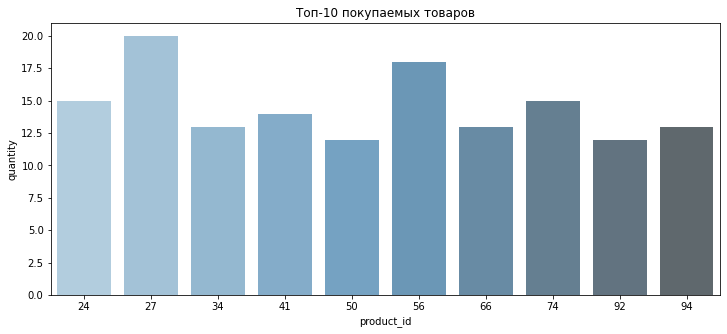

In [121]:
fig, ax = plt.subplots (figsize= (12,5))
ax = sns.barplot (x= 'product_id', y= 'quantity', data = top_product, palette="Blues_d", alpha = 0.8)

#Зададим заголовок
ax.set_title ('Топ-10 покупаемых товаров') 
plt.show()

С product_id равным 56 было продано 18 единиц товара.

#### 19. Посмотрим на продажи по дням! Для визуализации снова используйте барплот, только теперь по оси x будут дни, по которым у нас есть данные (date).

#### Далее выберите верные утверждения:

• Меньше всего продуктов было приобретено 4 декабря

• 4 декабря было куплено почти в два раза больше товаров, чем в предыдущий день

• 8 и 9 декабря было продано примерно одинаковое число товаров

• 5 декабря было куплено почти в три раза меньше товаров, чем в предыдущий день

• Меньше всего товаров было приобретено 6 декабря

• 7 декабря было куплено почти в два раза больше товаров, чем в предыдущий день

• Максимальное число товаров было продано 4 декабря

• 5 декабря было куплено почти в два раза больше товаров, чем в предыдущий день

Найдем топ 10 товаров по дням

In [122]:
top_product_date = df.groupby('date', as_index=False) \
    .agg({'quantity': 'sum'}) \
    .sort_values('quantity', ascending = False) \
    .reset_index(drop=True) \
    .head(10)

Text(0.5, 1.0, 'Топ-10 по дням')

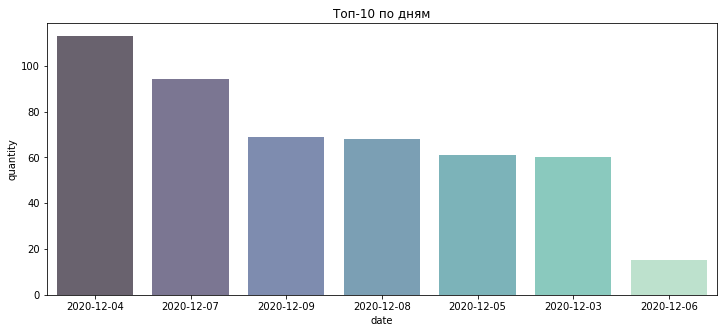

In [123]:
fig, ax = plt.subplots (figsize= (12,5))
ax = sns.barplot (x= 'date', y= 'quantity', data = top_product_date, palette="mako", alpha = 0.7)


ax.set_title ('Топ-10 по дням') 
plt.show()

Таким образом верны следующие утверждения:
* 4 декабря было куплено почти в два раза больше товаров, чем в предыдущий день
* 8 и 9 декабря было продано примерно одинаковое число товаров
* Меньше всего товаров было приобретено 6 декабря
* Максимальное число товаров было продано 4 декабря

#### 20. 💀 Сложное задание! 💀

#### Сколько пользователей приобрели какой-либо товар повторно (более 1 раза)? Повтором будем считать покупку товара с одинаковым product_id, совершенную в разные дни. 

#### Например, пользователь Sasha Tsarev дважды приобрел товар 6. Поскольку покупка была совершена в один и тот же день, повторной в данном случае она считаться не будет. Katya Skriptsova также сделал две покупки товара 7, но в разные дни, поэтому этот случай засчитывается.

Для начала исключим повторные покупки товара одним и тем же человеком в один день

Для этого удалим дубликаты по трём колонкам

In [124]:
df = df.drop_duplicates(subset=['product_id', 'name', 'date'])

Сгруппируем по имени и продукту и посчитаем количество дат

Отберем только те значения, где одна и та же дата встречалась неоднократно

In [125]:
df.groupby(['name', 'product_id'], as_index = False) \
    .agg({'date': 'count'}) \
    .query("date > 1")

,name,product_id,date
37,Anton_Ivanov,15,2
92,Petr_Fedorov,94,2
